In [34]:
123

123

# 문서 유사도

두 문서가 내용적으로 얼마나 비슷한지를 수치로 나타낸다.  
보통문서를 벡터(tf-dif등)으로 바꾼 후, 벡터 간 거리/각도를 계산해서 유사도를 구한다.

In [35]:
import os, glob
import pandas as pd
path = './data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path,'*.data'))

filename_list = []
opinion_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    #display(df)
    
    # 파일명
    filename = os.path.basename(file_)
    filename = filename.split('.')[0]
    filename_list.append(filename)
    
    # 의견
    opinions = df.to_string(index=False, header=False)
    opinion_list.append(opinions)
    
document_df = pd.DataFrame({
    'filenames' : filename_list,
    'opinions' : opinion_list
})

document_df

,filenames,opinions
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...
5,buttons_amazon_kindle,...
6,comfort_honda_accord_2008,...
7,comfort_toyota_camry_2007,...
8,directions_garmin_nuvi_255W_gps,...
9,display_garmin_nuvi_255W_gps,...


In [36]:
import string
import nltk 
from nltk.stem import WordNetLemmatizer     # 표제어 추출기

def lemmatize(text):
    text = text.lower()

    # 특수문자 제거
    punc_rem_dict = dict((ord(ch), None) for ch in string.punctuation)  # 특수문자 부호를 유니코드를 None으로 규칙 생성
    text = text.translate(punc_rem_dict)                                # 문장부호 삭제 적용
    
    # 토큰화
    tokens = nltk.word_tokenize(text)   # 단어 단위로 text 분리

    # 어근 분리
    lemmatizer = WordNetLemmatizer()    #

    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

In [37]:
# Lemmatize 적용 TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(
    tokenizer = lemmatize,
    stop_words = 'english',
    ngram_range=(1, 2), 
    max_df = 0.85,  # 상위 85%로 너무 자주 등장한 특성 제외
    min_df = 0.05   # 하위 5%로 너무 희귀하게 등장한 특성 제외
) 

opinions_vecs = tfidfVectorizer.fit_transform(document_df['opinions'])
opinions_vecs.toarray()

c:\Users\Playdata\nlp\nlp_venv\Lib\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Playdata\nlp\nlp_venv\Lib\site-packages\sklearn\feature_extraction\text.py:411: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


array([[0.04839089, 0.04839089, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01489834, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00424169, 0.        ,
        0.        ],
       [0.00879455, 0.00879455, 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(51, 4072))

In [38]:
from sklearn.cluster import KMeans      # KMeans 군집화 모델

kmeans = KMeans(
    n_clusters = 4,                     # 군집(클러스터) 갯수
    max_iter = 5000,                    # 최대 반복 횟수
    random_state= 0                     # 재현성
)

document_df['cluster'] = kmeans.fit_predict(opinions_vecs)                 # TF-IDF 기반 군집 라벨 추가
document_df

,filenames,opinions,cluster
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,2
4,battery-life_netbook_1005ha,...,2
5,buttons_amazon_kindle,...,0
6,comfort_honda_accord_2008,...,3
7,comfort_toyota_camry_2007,...,3
8,directions_garmin_nuvi_255W_gps,...,2
9,display_garmin_nuvi_255W_gps,...,2


In [39]:
# 호텔 관련 리뷰를 기준 리뷰로 설정
hotel_idx = document_df[document_df['cluster'] == 1].index
print(hotel_idx.shape)
print(hotel_idx)

(15,)
Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


In [40]:
# 첫 번째 리뷰를 기준 리뷰로 설정
document_df.iloc[1]

filenames                       bathroom_bestwestern_hotel_sfo
opinions                                                   ...
cluster                                                      1
Name: 1, dtype: object

In [41]:
opinions_vecs[1].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 4072))

In [42]:
# 모든 리뷰에 대한 유사도를 계산
from sklearn.metrics.pairwise import cosine_similarity

opinions_sim = cosine_similarity(opinions_vecs[1], opinions_vecs)   # 기준 리뷰 1개와 전체 리뷰 유사도 계산
opinions_sim

array([[0.00748211, 1.        , 0.00929825, 0.0057907 , 0.00951122,
        0.01189862, 0.04207734, 0.05068772, 0.00883856, 0.00840561,
        0.01333684, 0.0118808 , 0.01204711, 0.04527121, 0.05728026,
        0.06248841, 0.00753869, 0.02152493, 0.01696471, 0.02047214,
        0.06173425, 0.06124276, 0.00748295, 0.00877269, 0.04074639,
        0.01315832, 0.0105536 , 0.0222888 , 0.11626805, 0.00537765,
        0.41683399, 0.36028138, 0.51119681, 0.00799792, 0.01306653,
        0.01888393, 0.02248538, 0.01884263, 0.11499329, 0.15210166,
        0.1506946 , 0.04685638, 0.00708347, 0.00407049, 0.0150326 ,
        0.09851446, 0.08026128, 0.00684375, 0.00568624, 0.00898582,
        0.0080185 ]])

In [44]:
# 유사도 기준 높은순 정렬
opinions_sorted_idx = opinions_sim.argsort()[:, ::-1]       # 유사도 큰 순서로 인덱스 정렬 (내림차순)
opinions_sroted_idx = opinions_sorted_idx[:, 1:]            # 자기 자신( 유사도 1.0) 인덱스 제외
opinions_sorted_idx = opinions_sorted_idx.reshape(-1)       # 인덱스 배열을 1차원으로 변환

# 유사도가 높은순으로 정렬된 파일명을 조회
result_df = document_df.iloc[opinions_sorted_idx][["filenames", "cluster"]]  # 정렬된 순서대로 파일명/클러스터 추출
opinions_sim = opinions_sim.reshape(-1)                                     # 유사도 배열을 1차원으로 변환
result_df['similarity'] = opinions_sim[opinions_sorted_idx]                 # 정렬된 인덱스에 맞춰 유사도 컬럼 추가
result_df

,filenames,cluster,similarity
1,bathroom_bestwestern_hotel_sfo,1,1.000000
32,room_holiday_inn_london,1,0.511197
30,rooms_bestwestern_hotel_sfo,1,0.416834
31,rooms_swissotel_chicago,1,0.360281
39,service_holiday_inn_london,1,0.152102
40,service_swissotel_hotel_chicago,1,0.150695
28,price_holiday_inn_london,0,0.116268
38,service_bestwestern_hotel_sfo,1,0.114993
45,staff_bestwestern_hotel_sfo,1,0.098514
46,staff_swissotel_chicago,1,0.080261


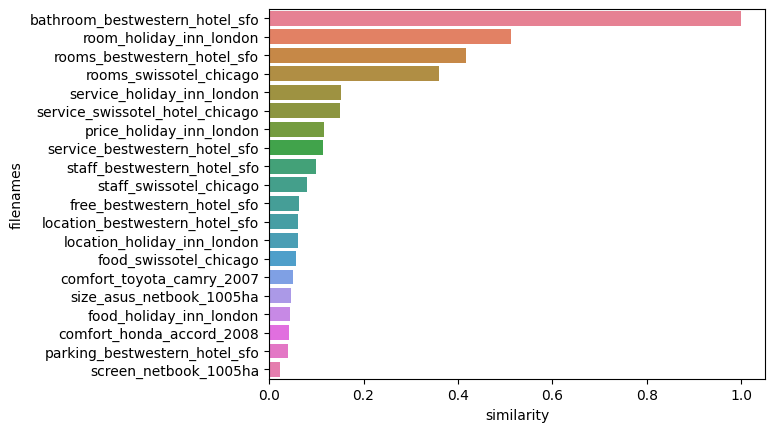

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x = 'similarity',            # 유사도 값
    y = 'filenames',              # 파일명
    data = result_df.iloc[:20],  # 유사도 상위 20개
    hue='filenames'               # 색상 구분은 (파일명별)
)

plt.show()